<a href="https://colab.research.google.com/github/madaliou/FaceIDSiamese/blob/main/Indexation_Projet_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importation des librairies

import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import time
import seaborn as sn
import pandas as pd
#from cm import *

In [ ]:
import gdown 
url = "https://drive.google.com/uc?id=1z7Wg5XlKemE1bQqy3JlcAAJG-lt-Bnn_"
out = "tobacco_examples.zip"
gdown.download(url, out, quiet=False)

!unzip tobacco_examples.zip

In [ ]:
# Chargement des Images

#path_img = 'dataset1_all/'
path_img = 'tobacco_examples/images/'
liste_images = [ f for f in os.listdir(path_img) if os.path.isfile(os.path.join(path_img,f)) ]

images_objets = []
labels_objets = []

with tqdm(total=len(liste_images), desc="Chargement", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
    for img in liste_images:
        if img.split('.')[1] == 'jpg':
            image = cv.imread(os.path.join(path_img, img))
            image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
            images_objets.append(image)
            labels_objets.append(img.split('.')[0])
        pbar.update(1)
    
images_objets = np.array(images_objets)
labels_objets = np.array(labels_objets)
print(images_objets.shape)
print(labels_objets.shape)

Chargement: 100%|██████████ [ time left: 00:00 ]

(45,)
(45,)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
# Nous allons convertir nos images en niveau de gris
def convertToGray(images):
    grayImages = [0] * images.shape[0]
    
    for i, img in enumerate(images):
        grayImages[i] = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    return np.array(grayImages)

In [ ]:
#Fonction pour l'affichage des resultats
def showResults(figsize, imagesArray, size):
  plt.figure(figsize=figsize)
  for k, i in np.ndenumerate(np.random.randint(imagesArray.shape[0], size=size)):
      ax = plt.subplot(4, 4, k[0] + 1)
      plt.imshow(imagesArray[i], cmap='gray')
      plt.title('Image N° {}'.format(i))
      plt.axis("off")

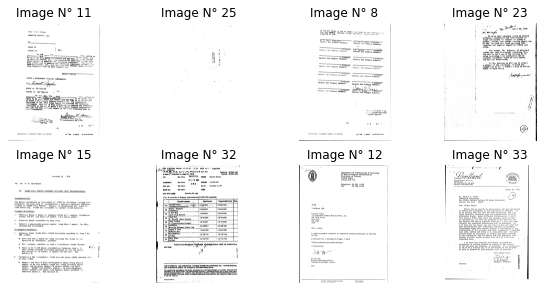

In [ ]:
showResults((10,10), images_objets, 8) 

In [ ]:
print(labels_objets)

['0015' '0024' '0048' '0007' '0052' '0043' '0055' '0053' '0034' '0042'
 '0020' '0046' '0022' '0025' '0056' '0026' '0049' '0037' '0028' '0047'
 '0041' '0006' '0029' '0044' '0045' '0008' '0033' '0027' '0021' '0002'
 '0036' '0038' '0016' '0057' '0004' '0030' '0023' '0032' '0001' '0017'
 '0010' '0013' '0031' '0035' '0039']


In [ ]:
# Fonction pour calculer les descripteurs locaux pour chaque image
def calculateDescriptors(images, grayImages):
    #sift = cv.xfeatures2d.SIFT_create()
    sift = cv.xfeatures2d.SIFT_create(nfeatures=200)
    descriptors = [0] * images.shape[0]
    keypoints = [0] * images.shape[0]
    keypointsList = [0] * images.shape[0]

    with tqdm(total=len(grayImages), desc="Chargement", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
      for i, img in enumerate(grayImages):
          kp, des = sift.detectAndCompute(img, None)
          descriptors[i] = des
          keypoints[i] = cv.drawKeypoints(img, kp, images[i].copy(), flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
          keypointsList[i] = kp
          pbar.update(1)
        
    return np.array(descriptors), np.array(keypoints), np.array(keypointsList)

In [ ]:
grayImages = convertToGray(images_objets)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


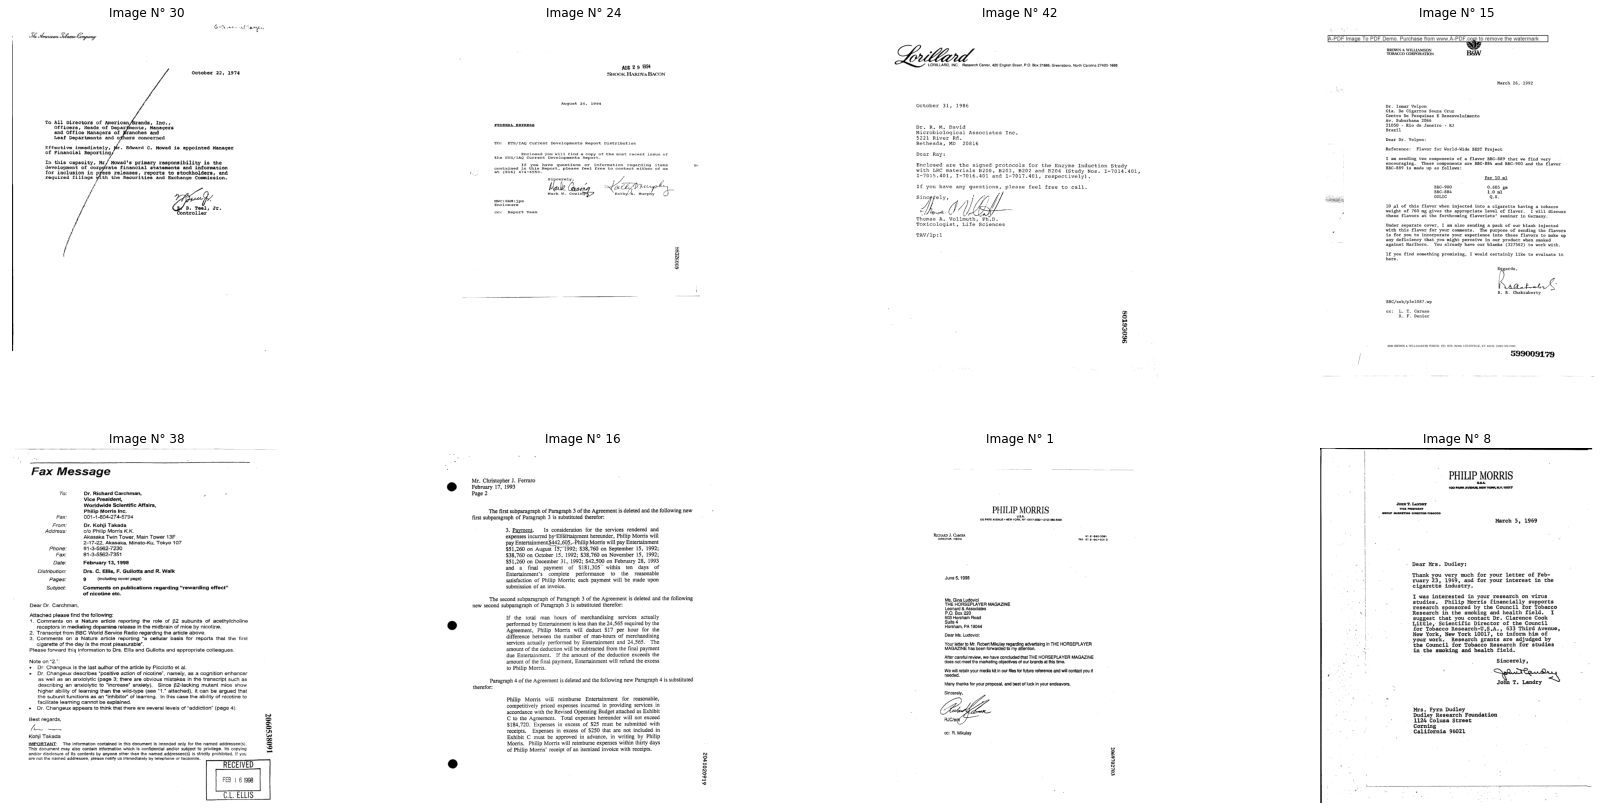

In [ ]:
showResults((30,30), grayImages, 8) 

In [ ]:
descriptors, KPImages, KP = calculateDescriptors(images_objets, grayImages)

Chargement: 100%|██████████ [ time left: 00:00 ]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
print(descriptors[0].shape)

(150, 128)


In [ ]:
print(descriptors[0])

In [ ]:
showResults((30,30), np.array(images_objets), 8)

In [ ]:
print(descriptors)

In [ ]:
#Nous allons enregistrer nos descripteurs dans des fichiers
np.save('descriptors.npy', descriptors)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp 'descriptors.npy' '/content/drive/MyDrive/'

In [ ]:
oldDescriptors = np.load('descriptors.npy', allow_pickle=True)

In [ ]:
!pip install lshashpy3
!python -c "import lshashpy3 as lshash; print(lshash.__version__);"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for lshashpy3: filename=lshashpy3-0.0.8-py3-none-any.whl size=8903 sha256=359e4f8e02ef0d9b2b8da927c56e62a34b8aed92e80ee11efd4c79d398f14b84
  Stored in directory: /root/.cache/pip/wheels/32/9b/ae/27f94ba2cd85b1cd5af645fa78f90b703c9e1fb9e2b55a04e0
Successfully built lshashpy3
0.0.8


In [ ]:
from lshashpy3 import LSHash

lsh = LSHash(6, 128)
i=0
essai = {}
with tqdm(total=len(descriptors), desc="Chargement", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
  for element in descriptors:
    for vector in element:
      lsh.index(vector, extra_data=labels_objets[i])
    i+=1
    pbar.update(1)

lsh
    

Chargement: 100%|██████████ [ time left: 00:00 ]


In [ ]:
np.save('lsh.npy', lsh)

In [ ]:
loadLsh =  np.load('lsh.npy', allow_pickle=True)

In [ ]:
!mkdir 'models'

In [ ]:
#enregistrement des descripteurs train et test dans  un fichier
with open("models/tableHashage.pickle", "wb") as file:
    pickle.dump(lsh, file, pickle.HIGHEST_PROTOCOL)

In [ ]:
#chargement des descripteurs train et test
# laod a pickle file
with open("models/tableHashage.pickle", "rb") as file:
    lsh = pickle.load(file)

In [ ]:
lsh

In [ ]:
import pickle
data = pickle.dumps(lsh)
f = open("lsh.txt", 'wb')
pickle.dump(data,f)
f.close()

In [ ]:
src_files = os.listdir('/content/saveFiles/')
for file_name in src_files:
  #print(file_name.split('.')[1] if len(file_name.split('.')) > 1 else ' ' )

  if file_name.split('.')[1] == 'txt':
    #print('ici')
    #print(file_name)
    print(src_files)
    chemin_fichier = os.path.join('/content/saveFiles/', file_name)
    ouverture_fichier = open(chemin_fichier,mode='rb')
    table_h = pickle.load(ouverture_fichier)
    ouverture_fichier.close()


['lsh.txt']


In [ ]:
print(table_h)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#Sauvegarder la table de hashage
import pickle

# Serialize the LSH
data = pickle.dumps(lsh)
# Now you can pass it as an argument to a forked process or simply save it
# in an external storage.
# In a different process, deserialize the LSH
lsh = pickle.loads(data)

TypeError: ignored

In [ ]:
def generate_une_image_par_frame(mp4_names):
  for name in mp4_names:
    a = name.split('/')
    c, d = a[len(a)-1].split('.')
    cap= cv2.VideoCapture(name)
    i = 0
    while(cap.isOpened()):
      ret, frame = cap.read()
      if ret == True and i == 0:
        cv2.imwrite('/content/dossier1/'+c+'.jpg',frame)
      if ret == False:
        break
      i += 1
    cap.release()
    cv2.destroyAllWindows()

generate_une_image_par_frame(mp4_names)

In [ ]:
def generate_one_frame_per_image(mp4_names):
  j = 0
  with tqdm(total=len(mp4_names), desc="Chargement", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
    for name in mp4_names:
      cap= cv.VideoCapture(name)
      print(name)
      i=0
      while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
          break
        if(i == 0):
          cv.imwrite('/content/frames/'+str(j)+'_'+str(i)+'.jpg',frame)
        i += 1
      j += 1
      pbar.update(1)
    
    cap.release()
    cv.destroyAllWindows()

In [ ]:
!mkdir 'frames'

In [ ]:
path_img = 'tobacco_examples/videos/'
liste_videos = [ 'tobacco_examples/videos/'+f for f in os.listdir(path_img) if os.path.isfile(os.path.join(path_img,f)) ]

In [ ]:
generate_one_frame_per_image(liste_videos)

In [ ]:
imgToQuery = cv.imread('frames/9_0.jpg', cv.COLOR_BGR2RGB)

imgToQueryToGray = cv.cvtColor(imgToQuery, cv.COLOR_RGB2GRAY)

#sift = cv.xfeatures2d.SIFT_create()
sift = cv.xfeatures2d.SIFT_create(nfeatures=150)

keypoints, descriptorToQuery = sift.detectAndCompute(imgToQueryToGray, None)


In [ ]:
finalDecompt = {}
with tqdm(total=len(descriptorToQuery), desc="Chargement", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
  for element in descriptorToQuery:
    nn = lsh.query(element, num_results=3, distance_func="euclidean")
    for ((vec,extra_data),distance) in nn:
      if extra_data not in finalDecompt:
        finalDecompt[extra_data] = 1
      else:
        finalDecompt[extra_data] +=1
    pbar.update(1)

Chargement: 100%|██████████ [ time left: 00:00 ]


In [ ]:
finalDecompt

In [ ]:
sorted(finalDecompt.items(), key=lambda item: item[1], reverse = True)

[('0033', 44),
 ('0041', 38),
 ('0002', 21),
 ('0008', 20),
 ('0032', 18),
 ('0052', 17),
 ('0048', 17),
 ('0001', 16),
 ('0021', 16),
 ('0049', 15),
 ('0022', 14),
 ('0025', 14),
 ('0015', 12),
 ('0055', 12),
 ('0027', 11),
 ('0016', 11),
 ('0020', 11),
 ('0026', 10),
 ('0028', 10),
 ('0042', 9),
 ('0056', 9),
 ('0047', 9),
 ('0017', 9),
 ('0037', 9),
 ('0039', 8),
 ('0031', 8),
 ('0023', 7),
 ('0044', 7),
 ('0036', 7),
 ('0046', 6),
 ('0029', 6),
 ('0053', 6),
 ('0010', 5),
 ('0057', 4),
 ('0007', 4),
 ('0004', 3),
 ('0035', 2),
 ('0038', 2),
 ('0030', 2),
 ('0024', 2),
 ('0034', 1),
 ('0013', 1)]

In [ ]:
for ((vec,extra_data),distance) in nn:
    print(vec, extra_data, distance)
    print('\n')

(0.0, 135.0, 67.0, 5.0, 1.0, 19.0, 6.0, 0.0, 22.0, 69.0, 135.0, 94.0, 0.0, 0.0, 0.0, 0.0, 120.0, 87.0, 44.0, 9.0, 3.0, 14.0, 14.0, 3.0, 13.0, 2.0, 0.0, 0.0, 0.0, 8.0, 52.0, 16.0, 0.0, 25.0, 29.0, 2.0, 96.0, 135.0, 15.0, 2.0, 92.0, 31.0, 69.0, 23.0, 7.0, 6.0, 35.0, 38.0, 135.0, 41.0, 4.0, 1.0, 0.0, 0.0, 4.0, 49.0, 31.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 4.0, 104.0, 126.0, 75.0, 33.0, 16.0, 0.0, 0.0, 0.0, 3.0, 13.0, 135.0, 135.0, 82.0, 2.0, 0.0, 0.0, 0.0, 0.0, 49.0, 135.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 2.0, 0.0, 0.0, 5.0, 19.0, 17.0, 32.0, 55.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 46.0, 57.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 17.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0) 0038 38168.0


(6.0, 51.0, 103.0, 49.0, 12.0, 10.0, 14.0, 17.0, 40.0, 50.0, 143.0, 52.0, 2.0, 8.0, 13.0, 8.0, 143.0, 91.0, 29.0, 4.0, 0.0, 0.0, 1.0, 8.0, 26.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.0, 32.0, 23.0, 26.0, 45.0, 33.0, 17.0, 22.0, 65.0, 18.0, 36.0, 30.0, 16.0, 16.0, 26.0, 32.0, 143.0, 

In [ ]:
# create 6-bit hashes for input data of 8 dimensions:
lsh = LSHash(6, 8)

# index vector and extra data
lsh.index([10,12,99,1,5,31,2,3], extra_data="vec1")

nn = lsh.query([10,12,99,1,5,30,1,1], num_results=1, distance_func="euclidean")
for ((vec,extra_data),distance) in nn:
    print(vec, extra_data, distance)